# What happened to Anastasia? (23/10/2024)

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
from Bio import Align, SeqIO, AlignIO
from Bio.Seq import Seq
from Bio.Align.Applications import ClustalwCommandline
import matplotlib.pyplot as plt
from Bio.SeqRecord import SeqRecord
from scipy.stats import entropy as en
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import linkage, dendrogram, leaves_list
import seaborn as sns
import os

In [2]:
os.chdir('/home/inf-21-2024/binp16/python_scripts/running_ex_3')

In [2]:
sequences = {
    "Princess Irene mtDNA": "AGGGAT??CTAGCTAGCA?AGCTAAT",
    "Prince Fred mtDNA": "ACC??TAGCTAG?TAGCATAGCTAAT",
    "Nicolas II Romanov mtDNA": "-----GGGG-----AAA---------",
    "Alexandra Romanov mtDNA": "AC---A----A---AGCA---?TA?C",
    "Olga Romanov mtDNA": "AGGG???---AGCTA--ATAG?TAGC",
    "Tatiana Romanov mtDNA": "AGG-------A------------AGC",
    "Maria Romanov mtDNA": "ACC???AGCTAGCT----TAGCTTTT",
    "Alexei Romanov mtDNA": "ACC--TAGCT???TAGCAT?GCT---",
    "Suspected body of Anastasia Romanov mtDNA": "??CAGAGACTCTC???CAAAGCTAGC",
    "Anastasia1 mtDNA": "ACTGTACGCCA??CAAGCA?G??A?C",
    "Anastasia2 mtDNA": "AGGG???GCT???GG????AGGGGAC",
    "Anastasia3 mtDNA": "ACC???AGC????GAGCATA??AATT",
    "Anastasia4 son mtDNA": "ACCAA??GCTAA?TAGCAT-GCT--G",
    "Anastasia5 mtDNA": "???AGAGACT??CTC??AAAGCT---",
    "Farmer's grandson mtDNA": "AACAGAGACTAAA???CAAAGCTATT",
    "Grigori Rasputin mtDNA": "AAAAAGGGGGGGGGCCCCCTATATAT"
}

hemophilia_status = {
    "Princess Irene": "Not affected",
    "Prince Fred": "Not affected",
    "Nicolas II Romanov": "Not affected",
    "Alexandra Romanov": "Carrier",
    "Olga Romanov": "Not affected",
    "Tatiana Romanov": "Not a carrier",
    "Maria Romanov": "Not a carrier",
    "Alexei Romanov": "Affected",
    "Suspected body of Anastasia Romanov": "Carrier",
    "Anastasia1": "Not a carrier",
    "Anastasia2": "Carrier",
    "Anastasia3": "Not a carrier",
    "Anastasia4 son": "Affected",
    "Anastasia5": "Not a carrier",
    "Farmer's grandson": "Not affected",
    "Grigori Rasputin": "Not a carrier"
}

# Anastasia 4 -> A hemophila carrier
# Farmers daughter -> Not a hemophilia carrier


In [3]:
combined_data = {
    "princess_irene": ["AGGGAT??CTAGCTAGCA?AGCTAAT", "not_affected", "female"],
    "prince_fred": ["ACC??TAGCTAG?TAGCATAGCTAAT", "not_affected", "male"],
    "nicolas_ii_romanov": ["-----GGGG-----AAA---------", "not_affected", "male"],
    "alexandra_romanov": ["AC---A----A---AGCA---?TA?C", "a_carrier", "female"],
    "olga_romanov": ["AGGG???---AGCTA--ATAG?TAGC", "not_affected", "female"],
    "tatiana_romanov": ["AGG-------A------------AGC", "not_carrier", "female"],
    "maria_romanov": ["ACC???AGCTAGCT----TAGCTTTT", "not_carrier", "female"],
    "alexei_romanov": ["ACC--TAGCT???TAGCAT?GCT---", "hemophilia_affected", "male"],
    "suspected_body_of_anastasia_romanov": ["??CAGAGACTCTC???CAAAGCTAGC", "a_carrier", "female"],
    "anastasia1": ["ACTGTACGCCA??CAAGCA?G??A?C", "not_carrier", "female"],
    "anastasia2": ["AGGG???GCT???GG????AGGGGAC", "a_carrier", "female"],
    "anastasia3": ["ACC???AGC????GAGCATA??AATT", "not_carrier", "female"],
    "anastasia4_son": ["ACCAA??GCTAA?TAGCAT-GCT--G", "hemophilia_affected", "male"],
    "anastasia5": ["???AGAGACT??CTC??AAAGCT---", "not_carrier", "female"],
    "farmers_grandson": ["AACAGAGACTAAA???CAAAGCTATT", "not_affected", "male"],
    "grigori_rasputin": ["AAAAAGGGGGGGGGCCCCCTATATAT", "not_carrier", "male"]
}


In [4]:
# Convert dictionary to list of SeqRecord objects
records = []
for seq_id, seq_info in combined_data.items():
    record = SeqRecord(Seq(seq_info[0]), id=seq_id)
    records.append(record)

# Write sequences to a temporary file
temp_fasta = "temp_sequences.fasta"
SeqIO.write(records, temp_fasta, "fasta")

16

In [5]:
records

[SeqRecord(seq=Seq('AGGGAT??CTAGCTAGCA?AGCTAAT'), id='princess_irene', name='<unknown name>', description='<unknown description>', dbxrefs=[]),
 SeqRecord(seq=Seq('ACC??TAGCTAG?TAGCATAGCTAAT'), id='prince_fred', name='<unknown name>', description='<unknown description>', dbxrefs=[]),
 SeqRecord(seq=Seq('-----GGGG-----AAA---------'), id='nicolas_ii_romanov', name='<unknown name>', description='<unknown description>', dbxrefs=[]),
 SeqRecord(seq=Seq('AC---A----A---AGCA---?TA?C'), id='alexandra_romanov', name='<unknown name>', description='<unknown description>', dbxrefs=[]),
 SeqRecord(seq=Seq('AGGG???---AGCTA--ATAG?TAGC'), id='olga_romanov', name='<unknown name>', description='<unknown description>', dbxrefs=[]),
 SeqRecord(seq=Seq('AGG-------A------------AGC'), id='tatiana_romanov', name='<unknown name>', description='<unknown description>', dbxrefs=[]),
 SeqRecord(seq=Seq('ACC???AGCTAGCT----TAGCTTTT'), id='maria_romanov', name='<unknown name>', description='<unknown description>', dbx

In [6]:
proper_name_df = pd.DataFrame(combined_data.keys(),columns=['name'])
proper_name_df['hemophilia_condition'] = [seq[1] for seq in combined_data.values()]
proper_name_df['gender'] = [seq[2] for seq in combined_data.values()]
proper_name_df

,name,hemophilia_condition,gender
0,princess_irene,not_affected,female
1,prince_fred,not_affected,male
2,nicolas_ii_romanov,not_affected,male
3,alexandra_romanov,a_carrier,female
4,olga_romanov,not_affected,female
5,tatiana_romanov,not_carrier,female
6,maria_romanov,not_carrier,female
7,alexei_romanov,hemophilia_affected,male
8,suspected_body_of_anastasia_romanov,a_carrier,female
9,anastasia1,not_carrier,female


In [7]:
alignment = AlignIO.read('temp_sequences.fasta',format='fasta')
alignment_df = pd.DataFrame(data=[list(rec) for rec in alignment],index=[rec.description for rec in alignment])
alignment_df = alignment_df.reset_index().rename(columns={'index':'name'})
alignment_df

,name,0,1,2,3,4,5,6,7,8,...,16,17,18,19,20,21,22,23,24,25
0,princess_irene <unknown description>,A,G,G,G,A,T,?,?,C,...,C,A,?,A,G,C,T,A,A,T
1,prince_fred <unknown description>,A,C,C,?,?,T,A,G,C,...,C,A,T,A,G,C,T,A,A,T
2,nicolas_ii_romanov <unknown description>,-,-,-,-,-,G,G,G,G,...,A,-,-,-,-,-,-,-,-,-
3,alexandra_romanov <unknown description>,A,C,-,-,-,A,-,-,-,...,C,A,-,-,-,?,T,A,?,C
4,olga_romanov <unknown description>,A,G,G,G,?,?,?,-,-,...,-,A,T,A,G,?,T,A,G,C
5,tatiana_romanov <unknown description>,A,G,G,-,-,-,-,-,-,...,-,-,-,-,-,-,-,A,G,C
6,maria_romanov <unknown description>,A,C,C,?,?,?,A,G,C,...,-,-,T,A,G,C,T,T,T,T
7,alexei_romanov <unknown description>,A,C,C,-,-,T,A,G,C,...,C,A,T,?,G,C,T,-,-,-
8,suspected_body_of_anastasia_romanov <unknown d...,?,?,C,A,G,A,G,A,C,...,C,A,A,A,G,C,T,A,G,C
9,anastasia1 <unknown description>,A,C,T,G,T,A,C,G,C,...,G,C,A,?,G,?,?,A,?,C


In [8]:
entropy = []
for i in range(0, alignment_df.shape[1]-1): 
    col = i 
    #print(col)
    analysis_df = alignment_df.iloc[:,1:]
    uniq_aa,uniq_aa_count = np.unique(np.array(analysis_df[col]),return_counts=True)
    df = pd.DataFrame({'Amino_Acid': uniq_aa, 'Values': uniq_aa_count})
    df = df[df['Amino_Acid'] != '-']
    uniq_count=np.array(df.groupby(by='Amino_Acid').sum()['Values'])
    #print(uniq_count)
    entropy.append(en(uniq_count))
alignment_df

,name,0,1,2,3,4,5,6,7,8,...,16,17,18,19,20,21,22,23,24,25
0,princess_irene <unknown description>,A,G,G,G,A,T,?,?,C,...,C,A,?,A,G,C,T,A,A,T
1,prince_fred <unknown description>,A,C,C,?,?,T,A,G,C,...,C,A,T,A,G,C,T,A,A,T
2,nicolas_ii_romanov <unknown description>,-,-,-,-,-,G,G,G,G,...,A,-,-,-,-,-,-,-,-,-
3,alexandra_romanov <unknown description>,A,C,-,-,-,A,-,-,-,...,C,A,-,-,-,?,T,A,?,C
4,olga_romanov <unknown description>,A,G,G,G,?,?,?,-,-,...,-,A,T,A,G,?,T,A,G,C
5,tatiana_romanov <unknown description>,A,G,G,-,-,-,-,-,-,...,-,-,-,-,-,-,-,A,G,C
6,maria_romanov <unknown description>,A,C,C,?,?,?,A,G,C,...,-,-,T,A,G,C,T,T,T,T
7,alexei_romanov <unknown description>,A,C,C,-,-,T,A,G,C,...,C,A,T,?,G,C,T,-,-,-
8,suspected_body_of_anastasia_romanov <unknown d...,?,?,C,A,G,A,G,A,C,...,C,A,A,A,G,C,T,A,G,C
9,anastasia1 <unknown description>,A,C,T,G,T,A,C,G,C,...,G,C,A,?,G,?,?,A,?,C


In [9]:
alignment_df = pd.merge(alignment_df,proper_name_df,on='name',how='outer')
alignment_df['name'] = alignment_df['name']

## Hierarchical Clustering

#### Some random data to work with

In [23]:
# Sequences data
sequences = {
    "Princess Irene mtDNA": "AGGGAT??CTAGCTAGCA?AGCTAAT",
    "Prince Fred mtDNA": "ACC??TAGCTAG?TAGCATAGCTAAT",
    "Nicolas II Romanov mtDNA": "-----GGGG-----AAA---------",
    "Alexandra Romanov mtDNA": "AC---A----A---AGCA---?TA?C",
    "Olga Romanov mtDNA": "AGGG???---AGCTA--ATAG?TAGC",
    "Tatiana Romanov mtDNA": "AGG-------A------------AGC",
    "Maria Romanov mtDNA": "ACC???AGCTAGCT----TAGCTTTT",
    "Alexei Romanov mtDNA": "ACC--TAGCT???TAGCAT?GCT---",
    "Suspected body of Anastasia Romanov mtDNA": "??CAGAGACTCTC???CAAAGCTAGC",
    "Anastasia1 mtDNA": "ACTGTACGCCA??CAAGCA?G??A?C",
    "Anastasia2 mtDNA": "AGGG???GCT???GG????AGGGGAC",
    "Anastasia3 mtDNA": "ACC???AGC????GAGCATA??AATT",
    "Anastasia4 son mtDNA": "ACCAA??GCTAA?TAGCAT-GCT--G",
    "Anastasia5 mtDNA": "???AGAGACT??CTC??AAAGCT---",
    "Farmer's grandson mtDNA": "AACAGAGACTAAA???CAAAGCTATT",
    "Grigori Rasputin mtDNA": "AAAAAGGGGGGGGGCCCCCTATATAT"
}

# Extract sequence labels
labels = list(sequences.keys())

# Generate a random distance matrix
n = len(sequences)
random_distance_matrix = np.random.rand(n, n)
random_distance_matrix = (random_distance_matrix + random_distance_matrix.T) / 2  # Symmetrize
np.fill_diagonal(random_distance_matrix, 0)  # Zero diagonal for self-distances
# Convert to a pandas DataFrame for better visualization
df = pd.DataFrame(random_distance_matrix, index=labels, columns=labels)
df = df.reset_index()
df.to_csv('./data/output_DNA.tsv', sep='\t', index=False)
# Print the matrix
df.head()

,index,Princess Irene mtDNA,Prince Fred mtDNA,Nicolas II Romanov mtDNA,Alexandra Romanov mtDNA,Olga Romanov mtDNA,Tatiana Romanov mtDNA,Maria Romanov mtDNA,Alexei Romanov mtDNA,Suspected body of Anastasia Romanov mtDNA,Anastasia1 mtDNA,Anastasia2 mtDNA,Anastasia3 mtDNA,Anastasia4 son mtDNA,Anastasia5 mtDNA,Farmer's grandson mtDNA,Grigori Rasputin mtDNA
0,Princess Irene mtDNA,0.000000,0.365409,0.734751,0.403004,0.249545,0.327953,0.397923,0.827924,0.939122,0.641607,0.840130,0.345139,0.472316,0.460969,0.575004,0.172965
1,Prince Fred mtDNA,0.365409,0.000000,0.676333,0.584103,0.875830,0.544561,0.941597,0.473971,0.662741,0.310387,0.594764,0.340646,0.155614,0.766941,0.311294,0.610809
2,Nicolas II Romanov mtDNA,0.734751,0.676333,0.000000,0.317246,0.242972,0.604164,0.491289,0.814110,0.386119,0.348917,0.625272,0.129653,0.377028,0.662267,0.611091,0.929422
3,Alexandra Romanov mtDNA,0.403004,0.584103,0.317246,0.000000,0.715716,0.585503,0.554847,0.164818,0.590131,0.367805,0.090860,0.737772,0.538203,0.064298,0.585450,0.658844
4,Olga Romanov mtDNA,0.249545,0.875830,0.242972,0.715716,0.000000,0.654228,0.317084,0.707892,0.205665,0.984172,0.631387,0.329011,0.594628,0.555567,0.354946,0.581116


In [24]:
similarity_df = pd.read_csv('./data/output_DNA.tsv',sep='\t')
similarity_df = similarity_df.rename(columns={'index':'names'})
similarity_matrix_output = np.array(similarity_df.iloc[:,1:])
similarity_labels = list(similarity_df['names'])
print(similarity_matrix_output.shape)
print(similarity_labels)
similarity_df.head()

(16, 16)
['Princess Irene mtDNA', 'Prince Fred mtDNA', 'Nicolas II Romanov mtDNA', 'Alexandra Romanov mtDNA', 'Olga Romanov mtDNA', 'Tatiana Romanov mtDNA', 'Maria Romanov mtDNA', 'Alexei Romanov mtDNA', 'Suspected body of Anastasia Romanov mtDNA', 'Anastasia1 mtDNA', 'Anastasia2 mtDNA', 'Anastasia3 mtDNA', 'Anastasia4 son mtDNA', 'Anastasia5 mtDNA', "Farmer's grandson mtDNA", 'Grigori Rasputin mtDNA']


,names,Princess Irene mtDNA,Prince Fred mtDNA,Nicolas II Romanov mtDNA,Alexandra Romanov mtDNA,Olga Romanov mtDNA,Tatiana Romanov mtDNA,Maria Romanov mtDNA,Alexei Romanov mtDNA,Suspected body of Anastasia Romanov mtDNA,Anastasia1 mtDNA,Anastasia2 mtDNA,Anastasia3 mtDNA,Anastasia4 son mtDNA,Anastasia5 mtDNA,Farmer's grandson mtDNA,Grigori Rasputin mtDNA
0,Princess Irene mtDNA,0.000000,0.365409,0.734751,0.403004,0.249545,0.327953,0.397923,0.827924,0.939122,0.641607,0.840130,0.345139,0.472316,0.460969,0.575004,0.172965
1,Prince Fred mtDNA,0.365409,0.000000,0.676333,0.584103,0.875830,0.544561,0.941597,0.473971,0.662741,0.310387,0.594764,0.340646,0.155614,0.766941,0.311294,0.610809
2,Nicolas II Romanov mtDNA,0.734751,0.676333,0.000000,0.317246,0.242972,0.604164,0.491289,0.814110,0.386119,0.348917,0.625272,0.129653,0.377028,0.662267,0.611091,0.929422
3,Alexandra Romanov mtDNA,0.403004,0.584103,0.317246,0.000000,0.715716,0.585503,0.554847,0.164818,0.590131,0.367805,0.090860,0.737772,0.538203,0.064298,0.585450,0.658844
4,Olga Romanov mtDNA,0.249545,0.875830,0.242972,0.715716,0.000000,0.654228,0.317084,0.707892,0.205665,0.984172,0.631387,0.329011,0.594628,0.555567,0.354946,0.581116


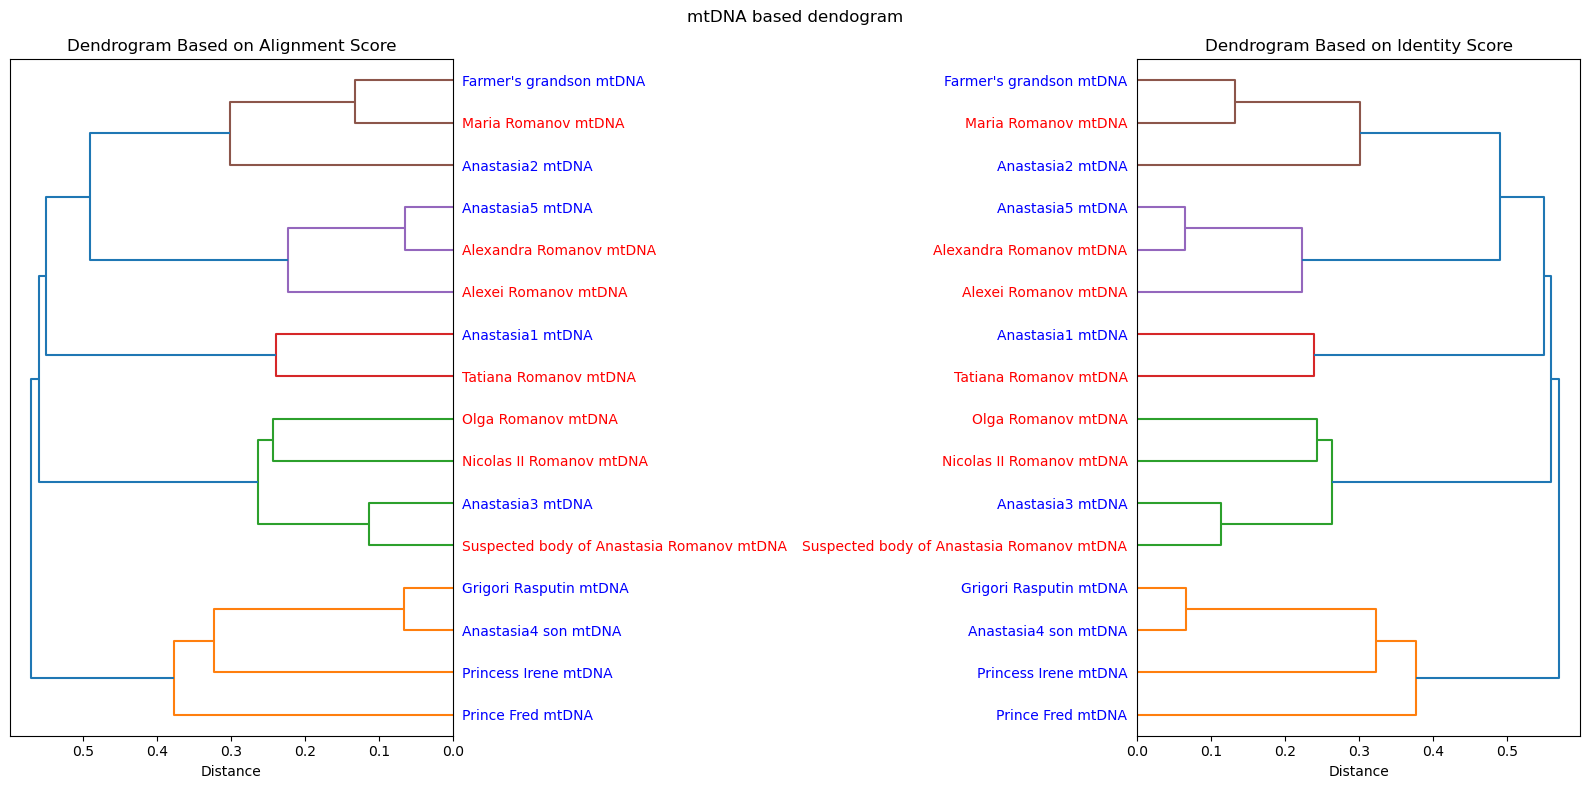

In [25]:
# Example matrices (replace with your actual distance matrices)
# Replace these matrices with your actual alignment and identity score matrices
alignment_matrix = squareform(similarity_matrix_output)  # Replace with your actual alignment score matrix
identity_matrix = squareform(similarity_matrix_output)  # Replace with your actual identity score matrix

# Perform hierarchical clustering on both matrices
Z_alignment = linkage(alignment_matrix, method='average')
Z_identity = linkage(identity_matrix, method='average')

# Romanov names for color-coding
romanov_names = [
    'Nicolas II Romanov', 'Alexandra Romanov', 'Olga Romanov', 
    'Tatiana Romanov', 'Maria Romanov', 'Alexei Romanov', 
    'Suspected body of Anastasia Romanov'
]

# Function to assign colors
def romanov_color(name):
    # If the individual's name contains any of the Romanov names, return 'red'
    if ' '.join(name.split(' ')[:-1]) in romanov_names:
        return 'red'
    else:
        return 'blue'

# Create subplots for the side-by-side dendrograms
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))

# Dendrogram for alignment score
dendro1 = dendrogram(
    Z_alignment, labels=similarity_labels, orientation='left', leaf_font_size=10,
    ax=ax1
)
ax1.set_title('Dendrogram Based on Alignment Score')
ax1.set_xlabel('Distance')

# Color the labels manually for alignment score dendrogram
for lbl in ax1.get_ymajorticklabels():
    lbl.set_color(romanov_color(lbl.get_text()))

# Dendrogram for identity score
dendro2 = dendrogram(
    Z_identity, labels=similarity_labels, orientation='right', leaf_font_size=10,
    ax=ax2
)
ax2.set_title('Dendrogram Based on Identity Score')
ax2.set_xlabel('Distance')

# Color the labels manually for identity score dendrogram
for lbl in ax2.get_ymajorticklabels():
    lbl.set_color(romanov_color(lbl.get_text()))

fig.suptitle('mtDNA based dendogram')
plt.tight_layout()
plt.show()

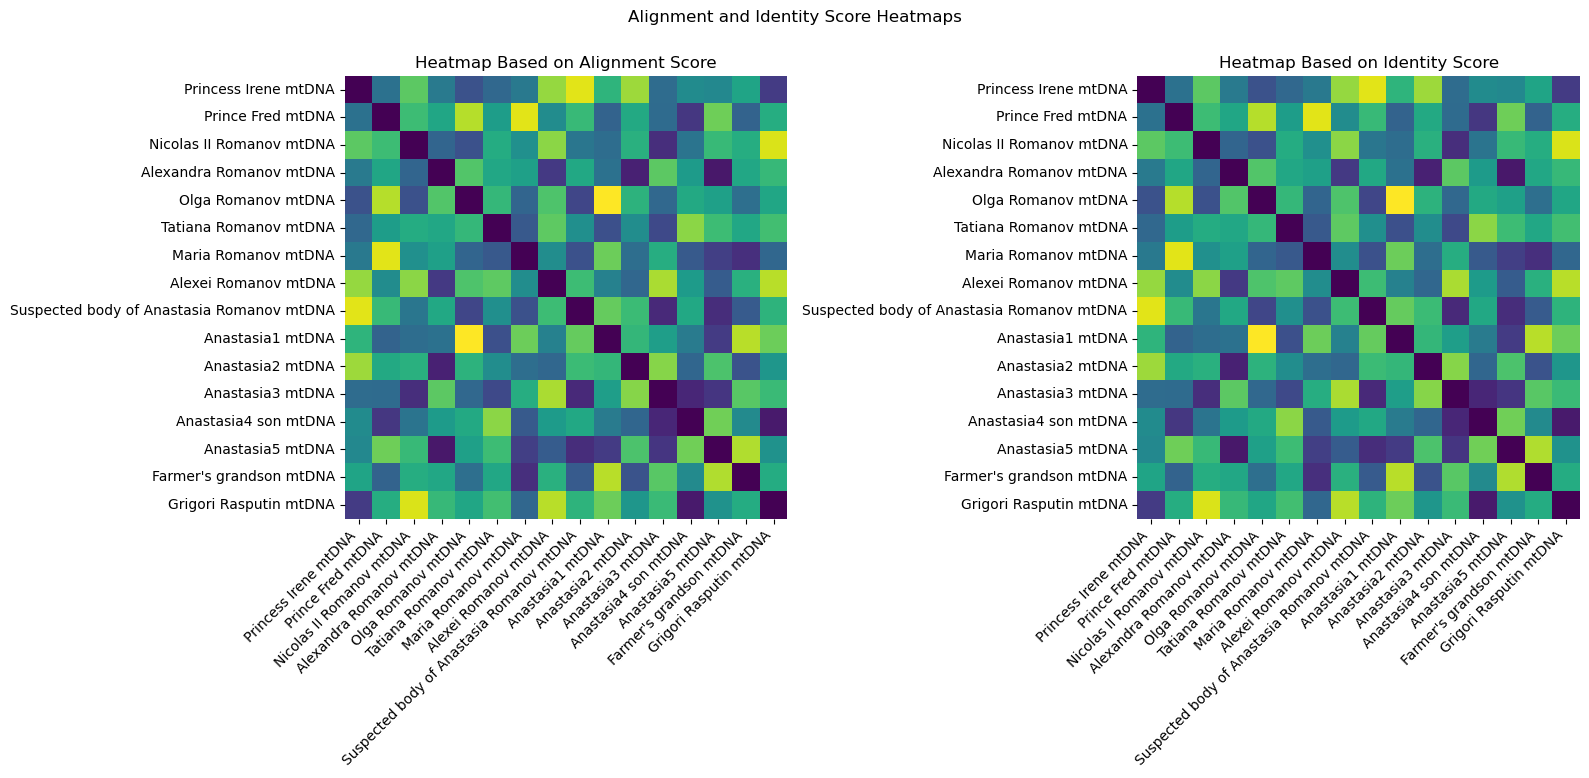

In [59]:
import textwrap
# Create subplots for the side-by-side heatmaps
labels = similarity_labels 
# Wrap labels using textwrap to fit within a max width of characters
wrapped_labels = ['\n'.join(textwrap.wrap(label, width=10)) for label in labels]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))

# Heatmap for alignment score
sns.heatmap(similarity_matrix_output, ax=ax1, cmap="viridis",xticklabels=labels, yticklabels=labels,cbar=False,square=True)
ax1.set_title('Heatmap Based on Alignment Score')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right')  # Rotate and align right

# Heatmap for identity score
sns.heatmap(similarity_matrix_output, ax=ax2, cmap="viridis", cbar=False, square=True, xticklabels=labels, yticklabels=labels)
ax2.set_title('Heatmap Based on Identity Score')
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45, ha='right')  # Rotate and align right

# Show the plot
plt.suptitle('Alignment and Identity Score Heatmaps')
plt.tight_layout()  # Adjust layout to fit the title
plt.show()

In [8]:
def read_dataframe(in_tsv: str) -> pd.core.frame.DataFrame:
    in_df = pd.read_csv(in_tsv,sep='\t')
    in_df = in_df.rename(columns={in_df.columns[0]:'names'})
    similarity_matrix_output = np.array(in_df.iloc[:,1:])
    similarity_labels = list(in_df['names'])
    #print(f'The matrix is of shape: {similarity_matrix_output.shape}')
    #print(f'The different labels in the matrix are: {similarity_labels}')
    return similarity_matrix_output, similarity_labels

In [9]:
read_dataframe('./data/mt_identity_ouput_DNA_jyothi.tsv')

(array([[0.   , 0.731, 0.654, 0.923, 0.692, 0.692, 0.885, 0.731, 0.923,
         0.846, 0.962, 0.692, 0.654, 0.692, 0.769, 0.846],
        [0.731, 0.   , 0.654, 0.692, 0.462, 0.385, 0.654, 0.654, 0.885,
         0.538, 0.923, 0.731, 0.308, 0.538, 0.692, 0.962],
        [0.654, 0.654, 0.   , 0.692, 0.654, 0.692, 0.808, 0.731, 0.885,
         0.769, 0.885, 0.692, 0.654, 0.731, 0.769, 0.846],
        [0.923, 0.692, 0.692, 0.   , 0.615, 0.692, 0.692, 0.769, 0.846,
         0.692, 0.962, 0.615, 0.654, 0.577, 0.769, 0.846],
        [0.692, 0.462, 0.654, 0.615, 0.   , 0.538, 0.808, 0.654, 0.769,
         0.5  , 0.923, 0.654, 0.346, 0.654, 0.769, 0.923],
        [0.692, 0.385, 0.692, 0.692, 0.538, 0.   , 0.692, 0.538, 0.808,
         0.5  , 0.923, 0.615, 0.346, 0.462, 0.654, 0.923],
        [0.885, 0.654, 0.808, 0.692, 0.808, 0.692, 0.   , 0.462, 0.885,
         0.692, 0.962, 0.769, 0.692, 0.654, 0.346, 1.   ],
        [0.731, 0.654, 0.731, 0.769, 0.654, 0.538, 0.462, 0.   , 0.769,
         0.

In [7]:
df = pd.read_csv('./data/mt_identity_ouput_DNA_jyothi.tsv',sep='\t')
df.columns[0]

'Unnamed: 0'